In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

C:\Users\spars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


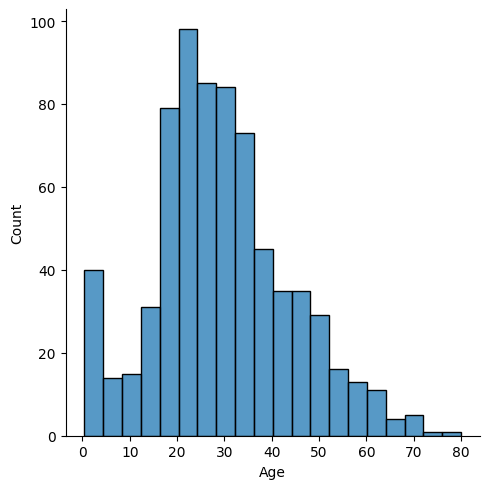

In [5]:
#Distribution of Age Column.
bins=np.arange(29,80,5)
sns.displot(train.Age)

In [6]:
#Filling missing values in Age Column with mean.
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [7]:
#converting Age to integer datatype.
train=train.astype({"Age": int})
train.Age.dtype

dtype('int32')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


In [9]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


C:\Users\spars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Age Distribution')

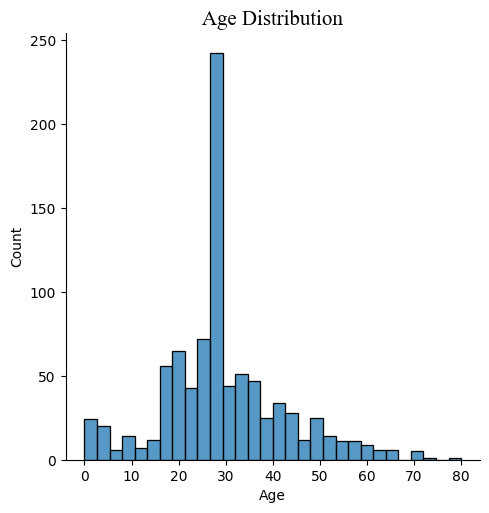

In [16]:
#Distribution of Age Column.
bins=np.arange(29,80,5)
sns.displot(train.Age)
plt.title("Age Distribution",font='Times New Roman',fontsize=15)

Text(0.5, 1.0, 'Male/Female embarked from different locations')

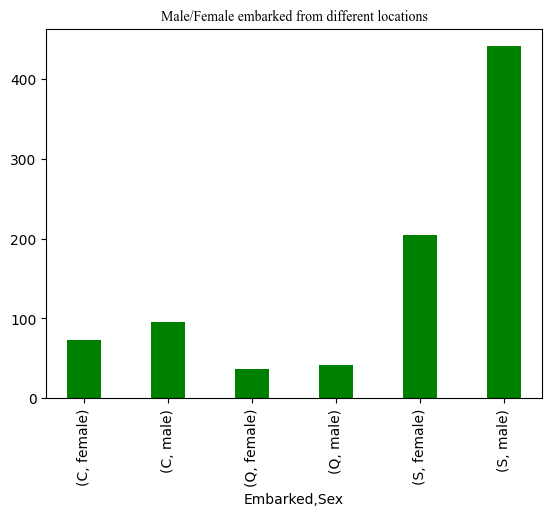

In [12]:

train.groupby(['Embarked','Sex'])['Age'].count().plot(kind='bar',width=0.4,color='green')
plt.title("Male/Female embarked from different locations",fontsize=15,font='Times New Roman')

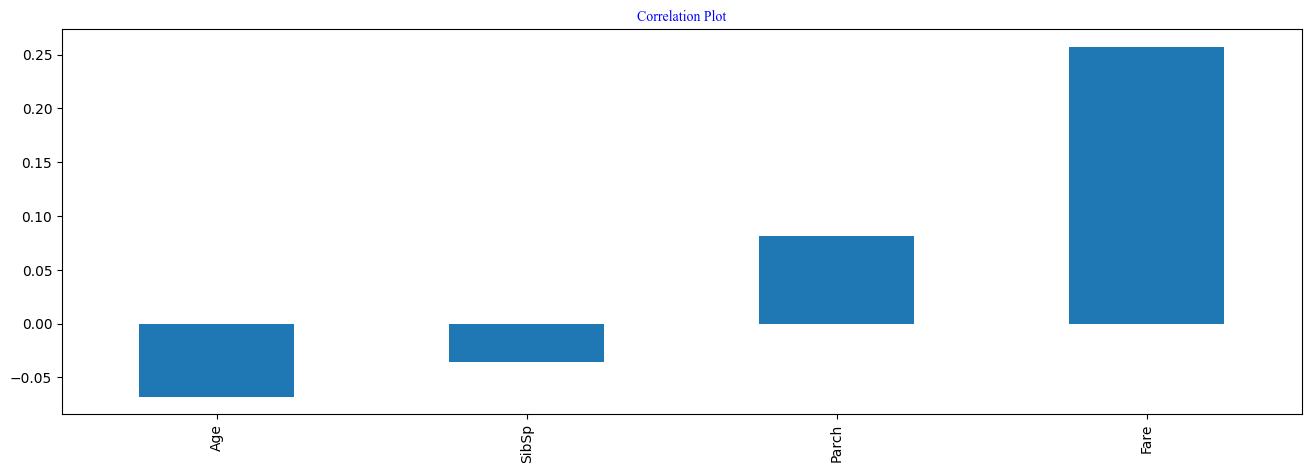

In [13]:
X = train[['Age','SibSp','Parch','Fare']]
y = train['Survived']

X.corrwith(y).plot.bar(figsize=(16, 5), rot=90, grid=False)
plt.title('Correlation Plot',
          fontsize=25,
          color='Blue',
          font='Times New Roman')
plt.show()

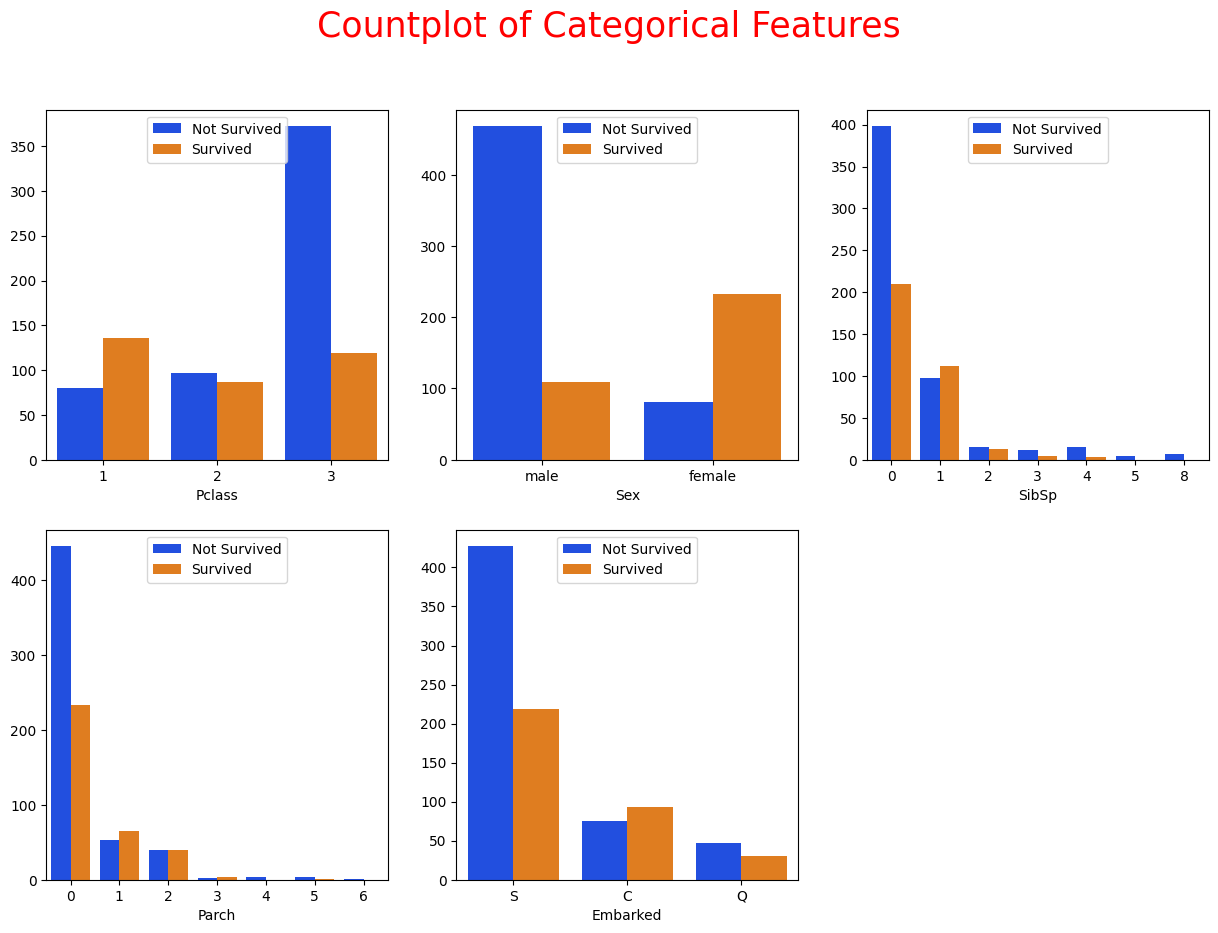

In [14]:
countfeature = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
countlist = list(enumerate(countfeature))

plt.figure(figsize = (15,10))
plt.suptitle("Countplot of Categorical Features", fontsize=25,color='Red')
for i in countlist: 
    plt.subplot(2,3,i[0]+1)
    sns.countplot(data = train, x = i[1], hue = "Survived", palette="bright")
    plt.ylabel("")
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 10})

plt.show()

Dealing  with missing Values in test data

In [69]:
all_data=pd.concat([train,test],ignore_index=True)

In [70]:
all_data[all_data['Fare'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [71]:
all_data[(all_data['Age']>60) & (all_data['Pclass']==3)
 & (all_data['SibSp']==0) & (all_data['Parch']==0) & 
 (all_data['Sex']=='male')]['Fare'].mean()

7.378125000000001

In [72]:
all_data['Fare'][1043]=7.3781

C:\Users\spars\AppData\Local\Temp\ipykernel_17364\1184194453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Fare'][1043]=7.3781


In [73]:
all_data['Fare'].isnull().any()

False

In [74]:
all_data[all_data['Age'].isnull()==True]['Pclass'].value_counts()

3    72
1     9
2     5
Name: Pclass, dtype: int64

In [75]:
all_data[all_data['Age'].isnull()==True]['SibSp'].unique()

array([0, 2, 1, 8], dtype=int64)

In [45]:
all_data[all_data['Age'].isnull()==True]['SibSp'].value_counts()

0    69
1    13
2     3
8     1
Name: SibSp, dtype: int64

In [78]:
all_data[(all_data['Pclass']==3) & (all_data['Age'].isnull()==True) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
901,902,NaN,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
920,921,NaN,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
924,925,NaN,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
927,928,NaN,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
930,931,NaN,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [79]:
all_data[(all_data['Sex']=='female') & (all_data['Pclass']==3)]['Age'].median()

26.0

In [80]:
all_data[(all_data['Sex']=='male') & (all_data['Pclass']==3)]['Age'].median()

28.0

In [81]:
male_index1 = all_data[(all_data["Age"].isnull() == True) & (all_data["Pclass"] == 3)
       &(all_data["Sex"] =="male")].index
female_index = all_data[(all_data["Age"].isnull() == True) & (all_data["Pclass"] == 3)
       &(all_data["Sex"] =="female")].index

In [82]:
all_data['Age'][male_index1]=26
all_data['Age'][female_index] = 28

C:\Users\spars\AppData\Local\Temp\ipykernel_17364\656624948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Age'][male_index1]=26
C:\Users\spars\AppData\Local\Temp\ipykernel_17364\656624948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Age'][female_index] = 28


In [83]:
all_data[(all_data['Pclass']==1) & (all_data['Age'].isnull()==True) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
913,914,NaN,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
932,933,NaN,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
1037,1038,NaN,1,"Hilliard, Mr. Herbert Henry",male,NaN,0,0,17463,51.8625,E46,S
1039,1040,NaN,1,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.5500,NaN,S
1059,1060,NaN,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C
1082,1083,NaN,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S
1096,1097,NaN,1,"Omont, Mr. Alfred Fernand",male,NaN,0,0,F.C. 12998,25.7417,NaN,C
1157,1158,NaN,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S
1181,1182,NaN,1,"Rheims, Mr. George Alexander Lucien",male,NaN,0,0,PC 17607,39.6000,NaN,S


In [86]:
all_data[(all_data['Pclass']==1) & (all_data['Sex']=='male')]['Age'].median()

38.0

In [87]:
all_data[(all_data['Pclass']==1) & (all_data['Sex']=='female')]['Age'].median()

35.0

In [88]:
male_index_p1 = all_data[(all_data["Age"].isnull() == True) & (all_data['Pclass']==1)
       &(all_data["Sex"] =="male")].index
female_index_p1= all_data[(all_data["Age"].isnull() == True) & (all_data['Pclass']==1)
       &(all_data["Sex"] =="female")].index


In [89]:
all_data['Age'][male_index_p1]=38
all_data['Age'][female_index_p1]=35

C:\Users\spars\AppData\Local\Temp\ipykernel_17364\2250633081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Age'][male_index_p1]=38
C:\Users\spars\AppData\Local\Temp\ipykernel_17364\2250633081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Age'][female_index_p1]=35


In [96]:
all_data[(all_data['Pclass']==2) & (all_data['Age'].isnull()==True) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
945,946,NaN,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
956,957,NaN,2,"Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...",female,NaN,0,0,F.C.C. 13534,21.0000,NaN,S
975,976,NaN,2,"Lamb, Mr. John Joseph",male,NaN,0,0,240261,10.7083,NaN,Q
1192,1193,NaN,2,"Malachard, Mr. Noel",male,NaN,0,0,237735,15.0458,D,C
1275,1276,NaN,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S


In [97]:
all_data[(all_data['Pclass']==2) & (all_data['Sex']=='male')]['Age'].median()

29.0

In [98]:
all_data[(all_data['Pclass']==2) & (all_data['Sex']=='female')]['Age'].median()

28.0

In [99]:
male_index_p2 = all_data[(all_data["Age"].isnull() == True) & (all_data['Pclass']==2)
       &(all_data["Sex"] =="male")].index
female_index_p2= all_data[(all_data["Age"].isnull() == True) & (all_data['Pclass']==2)
       &(all_data["Sex"] =="female")].index

In [100]:
all_data['Age'][male_index_p2]=29
all_data['Age'][female_index_p2]=28

C:\Users\spars\AppData\Local\Temp\ipykernel_17364\2193971427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Age'][male_index_p2]=29
C:\Users\spars\AppData\Local\Temp\ipykernel_17364\2193971427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Age'][female_index_p2]=28


In [101]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [103]:
train_data=all_data[:891]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [106]:
test_data=all_data[891:]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     0 non-null      float64
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


Model

In [125]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [133]:
features = ['Parch','SibSp','Sex','Embarked','Pclass']

In [142]:
x_train=pd.concat([train_data[['Age','Fare']],(pd.get_dummies(train_data[features],drop_first=True))],axis=1,join='inner')
x_train

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,22.0,7.2500,3,1,0,1,0,1
1,38.0,71.2833,1,1,0,0,0,0
2,26.0,7.9250,3,0,0,0,0,1
3,35.0,53.1000,1,1,0,0,0,1
4,35.0,8.0500,3,0,0,1,0,1
...,...,...,...,...,...,...,...,...
886,27.0,13.0000,2,0,0,1,0,1
887,19.0,30.0000,1,0,0,0,0,1
888,29.0,23.4500,3,1,2,0,0,1
889,26.0,30.0000,1,0,0,1,0,0


In [143]:
x_test=pd.concat([test_data[['Age','Fare']],(pd.get_dummies(test_data[features],drop_first=True))],axis=1,join='inner')
x_test

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
891,34.5,7.8292,3,0,0,1,1,0
892,47.0,7.0000,3,1,0,0,0,1
893,62.0,9.6875,2,0,0,1,1,0
894,27.0,8.6625,3,0,0,1,0,1
895,22.0,12.2875,3,1,1,0,0,1
...,...,...,...,...,...,...,...,...
1304,26.0,8.0500,3,0,0,1,0,1
1305,39.0,108.9000,1,0,0,0,0,0
1306,38.5,7.2500,3,0,0,1,0,1
1307,26.0,8.0500,3,0,0,1,0,1


In [144]:
y_train=train_data['Survived']

In [173]:
model=RandomForestClassifier(criterion='entropy',random_state=1)

Getting the best parameters

In [174]:
param_dist = {'n_estimators': randint(50,200),
              'max_depth': randint(1,20)}
rand_search=RandomizedSearchCV(model,param_distributions=param_dist)

In [175]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=1),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C63C59BE80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C63B8870A0>})

In [176]:
rnd=rand_search.best_estimator_

In [177]:
rand_search.best_params_

{'max_depth': 10, 'n_estimators': 86}

In [178]:
rnd.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=86,
                       random_state=1)

In [179]:
p=rnd.predict(x_test)
p

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

Accuracy Score

In [171]:
f=pd.read_csv('gender_submission.csv')

In [162]:
from sklearn.metrics import accuracy_score

In [180]:
acc=accuracy_score(f['Survived'],p)
acc

0.8397129186602871